In [1]:
#importing the python libraries for ML
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the training file
RawData= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [3]:
#Importing Total number of cases from the Total cases file
dn_cases= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
dn_cases.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [4]:
#importing the Test Data
#TestData = pd.read_csv('DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv')

In [5]:
RawData.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [6]:
#TestData.head(5)

In [7]:
RawData.count()

city                                     1456
year                                     1456
weekofyear                               1456
week_start_date                          1456
ndvi_ne                                  1262
ndvi_nw                                  1404
ndvi_se                                  1434
ndvi_sw                                  1434
precipitation_amt_mm                     1443
reanalysis_air_temp_k                    1446
reanalysis_avg_temp_k                    1446
reanalysis_dew_point_temp_k              1446
reanalysis_max_air_temp_k                1446
reanalysis_min_air_temp_k                1446
reanalysis_precip_amt_kg_per_m2          1446
reanalysis_relative_humidity_percent     1446
reanalysis_sat_precip_amt_mm             1443
reanalysis_specific_humidity_g_per_kg    1446
reanalysis_tdtr_k                        1446
station_avg_temp_c                       1413
station_diur_temp_rng_c                  1413
station_max_temp_c                

In [8]:
#RawData = pd.concat([RawData1,TestData], axis = 0) 
#RawData.tail(10)

In [9]:
# Importing the Total Number of cases 
RawData['Total_Cases'] = dn_cases['total_cases']
RawData.count()

city                                     1456
year                                     1456
weekofyear                               1456
week_start_date                          1456
ndvi_ne                                  1262
ndvi_nw                                  1404
ndvi_se                                  1434
ndvi_sw                                  1434
precipitation_amt_mm                     1443
reanalysis_air_temp_k                    1446
reanalysis_avg_temp_k                    1446
reanalysis_dew_point_temp_k              1446
reanalysis_max_air_temp_k                1446
reanalysis_min_air_temp_k                1446
reanalysis_precip_amt_kg_per_m2          1446
reanalysis_relative_humidity_percent     1446
reanalysis_sat_precip_amt_mm             1443
reanalysis_specific_humidity_g_per_kg    1446
reanalysis_tdtr_k                        1446
station_avg_temp_c                       1413
station_diur_temp_rng_c                  1413
station_max_temp_c                

In [10]:
# Spliting the  Cities, San Juan and Iquitos.
#dn_sj represents San Juan
dn_sj = RawData[RawData['city']=='sj']
dn_sj.iloc[935]

city                                             sj
year                                           2008
weekofyear                                       17
week_start_date                          2008-04-22
ndvi_ne                                      -0.037
ndvi_nw                                  -0.0103667
ndvi_se                                   0.0773143
ndvi_sw                                   0.0905857
precipitation_amt_mm                              0
reanalysis_air_temp_k                       298.673
reanalysis_avg_temp_k                       298.693
reanalysis_dew_point_temp_k                  294.28
reanalysis_max_air_temp_k                     300.9
reanalysis_min_air_temp_k                     295.9
reanalysis_precip_amt_kg_per_m2                2.17
reanalysis_relative_humidity_percent          76.96
reanalysis_sat_precip_amt_mm                      0
reanalysis_specific_humidity_g_per_kg       15.6714
reanalysis_tdtr_k                           3.95714
station_avg_

In [11]:
#dn_iq represents Iquitos
dn_iq = RawData[RawData['city']=='iq']
dn_iq.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [12]:
#Filling the NULL values for San Juan city with the mean of each column
dn_sj = dn_sj.fillna(value=dn_sj.mean())
dn_sj.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [13]:
#Filling the NULL values for the city Iquitos with the mean of each column
dn_iq = dn_iq.fillna(value=dn_iq.mean())
dn_iq.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


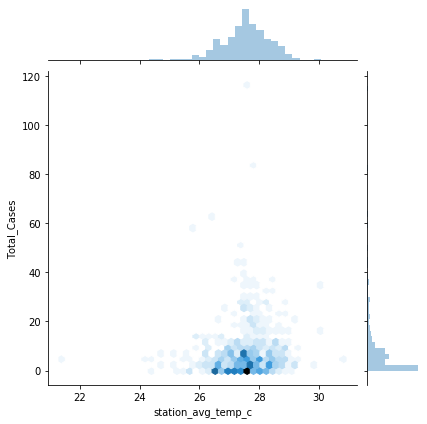

In [14]:
sns.jointplot(x = 'station_avg_temp_c', y = 'Total_Cases', data = dn_iq, kind = 'hex')

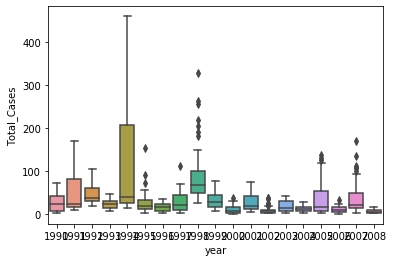

In [15]:
sns.boxplot(x='year', y = 'Total_Cases', data = dn_sj)

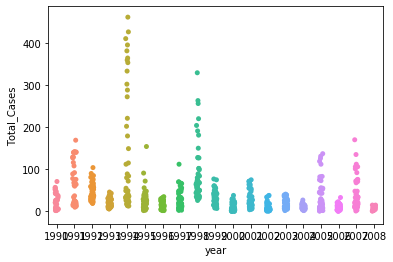

In [118]:
sns.stripplot(x='year', y = 'Total_Cases', data = dn_sj)

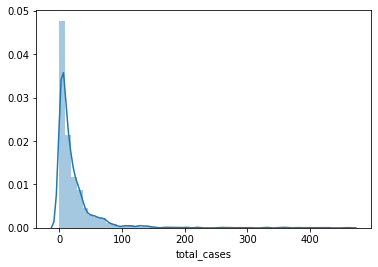

In [119]:
sns.distplot(dn_cases['total_cases'])

In [16]:
#Since we are predicting the Total Cases we are droping the Total_cases column as this will be "Y" value
x1 = dn_sj.drop(['Total_Cases'], axis = 1).values
x1
dn_sj.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'Total_Cases'],
      dtype='object')

In [155]:
#WE are removing the Yean and City Column as they do mot hae any correlation with the rest of the data
#x = np.delete(x1,[0,3],1)
#x = np.delete(x,0,1)
X = dn_sj[[  'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm',]]

In [156]:
x

array([[18, 0.1226, 0.103725, ..., 29.4, 20.0, 16.0],
       [19, 0.1699, 0.142175, ..., 31.7, 22.2, 8.6],
       [20, 0.03225, 0.1729667, ..., 32.2, 22.8, 41.4],
       ...,
       [15, -0.1552, -0.05275, ..., 29.4, 21.7, 30.7],
       [16, 0.0018, 0.06746906815219837, ..., 29.4, 21.7, 11.2],
       [17, -0.037000000000000005, -0.01036667, ..., 31.7, 23.3, 0.3]],
      dtype=object)

In [124]:
# We are assigning the Y values to the Total Cases as we need to train the Data for running the model on TEST dataset
y = dn_sj['Total_Cases'].values

In [157]:
y

array([  4,   5,   4,   3,   6,   2,   4,   5,  10,   6,   8,   2,   6,
        17,  23,  13,  21,  28,  24,  20,  40,  27,  42,  33,  43,  37,
        57,  71,  44,  56,  53,  52,  47,  26,  27,  21,  21,  26,  34,
        37,  17,  19,  25,  18,  21,  17,  17,  16,  16,  15,  23,  16,
        17,  12,  17,  10,  15,  19,  21,  14,  18,  13,  14,  18,  23,
        25,  62,  60,  76,  66,  64,  68,  89,  92, 140, 116, 142, 129,
       140, 140, 127, 129, 169, 141, 108,  78,  70,  81, 104,  90,  85,
        55,  53,  65,  33,  38,  59,  40,  37,  29,  30,  30,  28,  23,
        24,  29,  26,  23,  20,  19,  20,  26,  29,  31,  28,  26,  32,
        35,  33,  30,  52,  59,  67,  65,  74,  70,  61,  53,  76,  61,
        57,  44,  34,  47,  60,  60,  53,  36,  31,  30,  32,  28,  33,
        33,  35,  22,  13,  13,  21,  17,  11,   8,   8,   6,   6,   7,
        12,  17,  10,  10,  18,  19,  12,  22,  12,  21,  18,  16,  16,
        22,  17,  25,  23,  12,  25,  28,  27,  18,  23,  23,  2

In [158]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size = 0.25, random_state = 200)
y_test

array([ 14,  23,  16,  29,  44,   3,  19, 353,  61,  15,  65,  23,   8,
         7,  17,  19,   5,  46,  71,  61,  10,   6,  10,  27,  13,  89,
        30,   8,  59,  29,  33,   6,  49,  36,  40,  75,   5,  27,  37,
        38,   6,  14,   4,  11,   0,  21,  18,  17,  59,  49,   6,  46,
        14,  71,  26,   6,   8,  20,   7,  24,  25,   1,  34,  19,  53,
         3,  35,  37,   7,  18,   3,  13,  12,   5,  10,   6,   9,  56,
        30,   2,  56,  14,  52,  53,  18,   2,  15,  61,  29,  17,  47,
        28,  75,   5,  44,  24,  49,  24,  11,   9,   7,  11,  25,   6,
         7,  28,  16,  56, 140,  18,  11,  16,  28,  13,   7,   6,  23,
        17,  26,  28,   9,  12, 461,   9,  10,  37, 104,  23,   5,  28,
        36,  14,  23,   4,  80,  11,  23,   6,  20,  11,  15,  16,   2,
         2,   7,  18,  50,  23, 191, 381,   9,  25,  16,  75,  66,   6,
       221,  27,   3,  14,  34,  11,  26,   6,  42,  44,  24, 126,  11,
        15,   4,  42,  65,  40,  99,   5,  10,  13,   7,  14,  4

In [159]:
# Linear Regression
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [160]:
print(ml.intercept_)

10202.696607753142


In [161]:
ml.coef_

array([ 8.81721777e-01,  9.54029476e+00,  1.20348278e+01, -3.13315016e+01,
        3.51773555e+01, -4.20215894e-02, -4.30524171e+01, -2.93955558e+01,
        2.91418687e+01,  9.89621734e+00,  1.09052060e+00,  6.06534930e-02,
       -1.33554507e+01, -4.20215894e-02,  3.75001999e+01, -1.14644227e+01,
       -1.15754171e+00, -2.65616657e-01,  4.62719335e+00, -3.39350872e+00,
       -4.93043851e-02])

In [167]:
x_train.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [163]:
#predicting Linear Regression
y_pred=ml.predict(x_test)
y_pred

array([ 43.14281258,  58.64677711,  30.51175102,  13.06359372,
        49.44373098,  19.75368659,  37.2486045 ,  49.47055661,
        59.41171097,   2.48976036,  59.30603381,  36.10141964,
        14.7104434 ,  18.81184224,  45.38835098,  47.12120955,
        50.18010265,   6.52782033,  46.0220597 ,  57.20275371,
        15.76899917,  41.15336634, -13.58995559,  56.09809451,
        46.76310069,  58.25343016,  51.27839729,   9.28758697,
        40.24984757,  53.49994462,  57.96777781,  46.89528487,
        35.64754871,  36.00517663,  54.62990788,   9.43726293,
        29.48979485,  33.0515143 ,   9.74843397,   8.33160835,
        60.63505165,   2.4449313 ,   0.49805711,  16.534114  ,
        17.46287936,  50.4058238 ,  21.64157534,  26.58013403,
        24.050558  ,  58.20638721,  45.01620246,  51.40057813,
        48.85502595,  68.23181464,  48.86799805,  24.72352626,
        20.28000851,  52.28056771,  40.85872827,  52.31150904,
        33.93781666,  18.9172214 ,  63.81947803,  31.65

In [164]:
#Linear Regression
(y_test)

array([ 14,  23,  16,  29,  44,   3,  19, 353,  61,  15,  65,  23,   8,
         7,  17,  19,   5,  46,  71,  61,  10,   6,  10,  27,  13,  89,
        30,   8,  59,  29,  33,   6,  49,  36,  40,  75,   5,  27,  37,
        38,   6,  14,   4,  11,   0,  21,  18,  17,  59,  49,   6,  46,
        14,  71,  26,   6,   8,  20,   7,  24,  25,   1,  34,  19,  53,
         3,  35,  37,   7,  18,   3,  13,  12,   5,  10,   6,   9,  56,
        30,   2,  56,  14,  52,  53,  18,   2,  15,  61,  29,  17,  47,
        28,  75,   5,  44,  24,  49,  24,  11,   9,   7,  11,  25,   6,
         7,  28,  16,  56, 140,  18,  11,  16,  28,  13,   7,   6,  23,
        17,  26,  28,   9,  12, 461,   9,  10,  37, 104,  23,   5,  28,
        36,  14,  23,   4,  80,  11,  23,   6,  20,  11,  15,  16,   2,
         2,   7,  18,  50,  23, 191, 381,   9,  25,  16,  75,  66,   6,
       221,  27,   3,  14,  34,  11,  26,   6,  42,  44,  24, 126,  11,
        15,   4,  42,  65,  40,  99,   5,  10,  13,   7,  14,  4

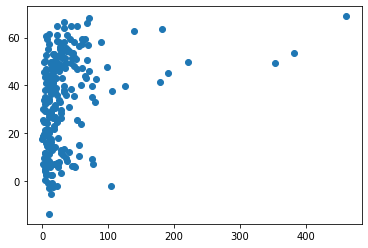

In [165]:
plt.scatter(y_test,y_pred)

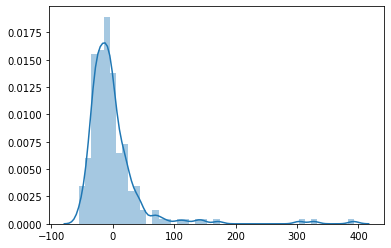

In [166]:
sns.distplot(y_test-y_pred)

In [140]:
from sklearn import metrics

In [141]:
metrics.mean_absolute_error(y_test, y_pred)

27.364993408834692

In [142]:
metrics.mean_squared_error(y_test, y_pred)

2555.378530731865

In [143]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

50.55075202934042

In [144]:
from sklearn.model_selection import train_test_split

In [65]:
from sklearn.ensemble import RandomForestRegressor 

In [66]:
regressor = RandomForestRegressor(n_estimators=300)

In [102]:
#regressor.fit(x_train,y_train)

In [101]:
#pr = regressor.predict(x_test)

In [119]:
type(pr)

numpy.ndarray

In [100]:
#pr